In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("..\Dataset\heart.csv") #loading the dataset
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Normalization
df["age"]=df["age"]/df["age"].max()
df["chol"]=df["chol"]/df["chol"].max()
df["thalach"]=df["thalach"]/df["thalach"].max()
df["trestbps"]=df["trestbps"]/df["trestbps"].max()
df["cp"]=df["cp"]/df["cp"].max()
df["fbs"]=df["fbs"]/df["fbs"].max()
df["oldpeak"]=df["oldpeak"]/df["oldpeak"].max()
df["slope"]=df["slope"]/df["slope"].max()
df["ca"]=df["ca"]/df["ca"].max()
df["thal"]=df["thal"]/df["thal"].max()
df["exang"]=df["exang"]/df["exang"].max()
df["restecg"]=df["restecg"]/df["restecg"].max()

In [4]:
df.head() 
#after normalization the data looks like this

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.818182,1,1.000000,0.725,0.413121,1.0,0.0,0.742574,0.0,0.370968,0.0,0.0,0.333333,1
1,0.480519,1,0.666667,0.650,0.443262,0.0,0.5,0.925743,0.0,0.564516,0.0,0.0,0.666667,1
2,0.532468,0,0.333333,0.650,0.361702,0.0,0.0,0.851485,0.0,0.225806,1.0,0.0,0.666667,1
3,0.727273,1,0.333333,0.600,0.418440,0.0,0.5,0.881188,0.0,0.129032,1.0,0.0,0.666667,1
4,0.740260,0,0.000000,0.600,0.627660,0.0,0.5,0.806931,1.0,0.096774,1.0,0.0,0.666667,1


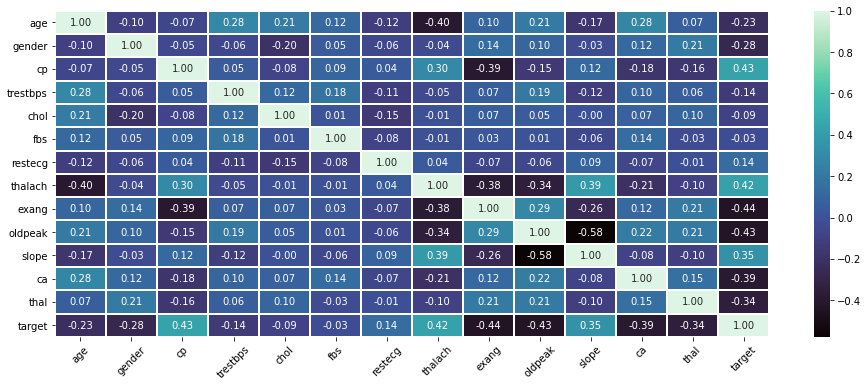

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
heat_map = sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f', linewidths=2, cmap='mako')
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45); # correlations between the features
# positive value means high correlation

In [6]:
x = df[['age', 'gender','cp','trestbps','fbs','chol','restecg','thalach','exang','oldpeak','slope','ca','thal']].values # selecting the features for x
y = df['target'].values

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=5)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [8]:
# Using Support vector machine

In [9]:
from sklearn import svm 
clf = svm.SVC(kernel = 'poly', degree = 3) #svm model with polynomial kernel of degree 3
#training over the dataset
clf.fit(x_train, y_train) 

SVC(kernel='poly')

In [10]:
from sklearn.metrics import accuracy_score
print("Train set Accuracy: ", accuracy_score(y_train, clf.predict(x_train)))
print("Test set Accuracy: ", accuracy_score(y_test, clf.predict(x_test)))

Train set Accuracy:  0.9090909090909091
Test set Accuracy:  0.8524590163934426


In [11]:
# Using K-nearest Neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#training over the dataset
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)

In [13]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, neigh.predict(x_test)))

Train set Accuracy:  0.8388429752066116
Test set Accuracy:  0.8360655737704918
